**Author:Utkarsha Sathe**

**Task 4:Exploratory Data Analysis on dataset - 'Global Terrorism'**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
## load from google drive
file_path = 'gdrive/My Drive/Colab Notebooks/GlobalTerrorism.csv'

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/GlobalTerrorism.csv',encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country','provstate':'State','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','targsubtype1':'Motive','target1':'Target','summary':'Summary','region_txt':'Region','location':'Group','nkill':'Killed','nwound':'Wounded','weapsubtype4':'Weapon_type'},inplace = True)

In [ ]:
df=df[['Year','Month','Day','Extended','Country','Region','Group','city','latitude','longitude','Attacktype','Targettype','Motive','Killed','Wounded','Target','Summary','Weapon_type','State']]

In [ ]:
df.head()

,Year,Month,Day,Extended,Country,Region,Group,city,latitude,longitude,Attacktype,Targettype,Motive,Killed,Wounded,Target,Summary,Weapon_type,State
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,68.0,1.0,0.0,Julio Guzman,NaN,NaN,NaN
1,1970,0,0,0,Mexico,North America,NaN,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),45.0,0.0,0.0,"Nadine Chaval, daughter",NaN,NaN,Federal
2,1970,1,0,0,Philippines,Southeast Asia,NaN,Unknown,15.478598,120.599741,Assassination,Journalists & Media,54.0,1.0,0.0,Employee,NaN,NaN,Tarlac
3,1970,1,0,0,Greece,Western Europe,NaN,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),46.0,NaN,NaN,U.S. Embassy,NaN,NaN,Attica
4,1970,1,0,0,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),46.0,NaN,NaN,U.S. Consulate,NaN,NaN,Fukouka


In [ ]:
df.tail()

,Year,Month,Day,Extended,Country,Region,city,latitude,longitude,Attacktype,Targettype,Motive,Killed,Wounded,Target,Summary,Weapon_type,State
181686,2017,12,31,0,Somalia,11,Ceelka Geelow,2.359673,45.385034,Armed Assault,4,2.0,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,NaN,Middle Shebelle
181687,2017,12,31,0,Syria,10,Jableh,35.407278,35.942679,Bombing/Explosion,4,1.0,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Mortars were used in the attack.,Lattakia
181688,2017,12,31,0,Philippines,5,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,14,2.0,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,NaN,Maguindanao
181689,2017,12,31,0,India,6,Imphal,24.798346,93.940430,Bombing/Explosion,2,1.0,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,A thrown grenade was used in the attack.,Manipur
181690,2017,12,31,0,Philippines,5,Cotabato City,7.209594,124.241966,Bombing/Explosion,20,1.0,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,An explosive device containing a detonating co...,Maguindanao


In [ ]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
Region              0
Group          126196
city              434
latitude         4556
longitude        4557
Attacktype          0
Targettype          0
Motive          10373
Killed          10313
Wounded         16311
Target            636
Summary         66129
Weapon_type    181621
State             421
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Extended     181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   Group        55495 non-null   object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  Attacktype   181691 non-null  object 
 11  Targettype   181691 non-null  int64  
 12  Motive       171318 non-null  float64
 13  Killed       171378 non-null  float64
 14  Wounded      165380 non-null  float64
 15  Target       181055 non-null  object 
 16  Summary      115562 non-null  object 
 17  Weapon_type  70 non-null      float64
 18  State        181270 non-

In [ ]:
df.describe()

,Year,Month,Day,Extended,latitude,longitude,Targettype,Motive,Killed,Wounded,Weapon_type
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171318.000000,171378.000000,165380.000000,70.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,8.439719,46.971474,2.403272,3.167668,10.842857
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,6.653838,30.953357,11.545741,35.949392,8.192672
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,1.000000,0.000000,0.000000,2.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,3.000000,22.000000,0.000000,0.000000,3.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,4.000000,35.000000,0.000000,0.000000,9.500000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,14.000000,74.000000,2.000000,2.000000,16.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,22.000000,113.000000,1570.000000,8191.000000,28.000000


In [ ]:
#Destructive Features
print("Country with the most attacks:",df['Country'].value_counts().idxmax(axis=0,skipna=True))
print("City with the most attacks:",df['city'].value_counts().index[1]) #As first entry is unknown
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().idxmax())
print("Most attack types:",df['Attacktype'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: The attack took place in Baghdad, Baghdad, Iraq.
Most attack types: Bombing/Explosion


**Data Visualisation** 

***1:Number of Terrorists Activities Each Year ***

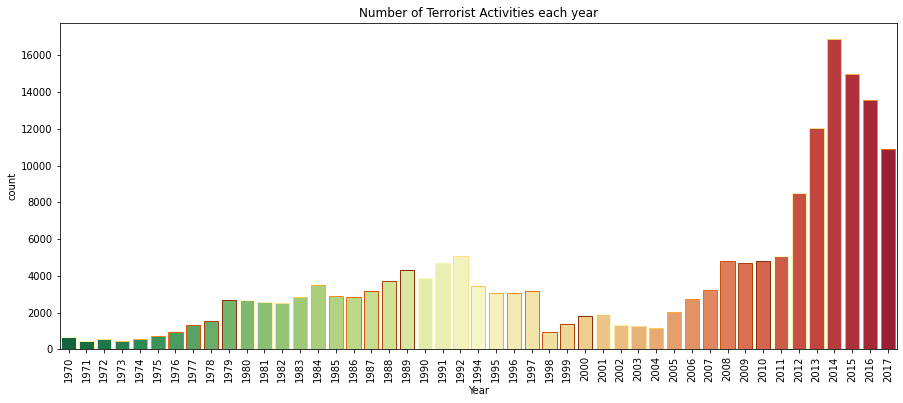

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data = df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr",10))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities each year")
plt.show()

**2. Number of Terrorist Activities  by Region Each Year**

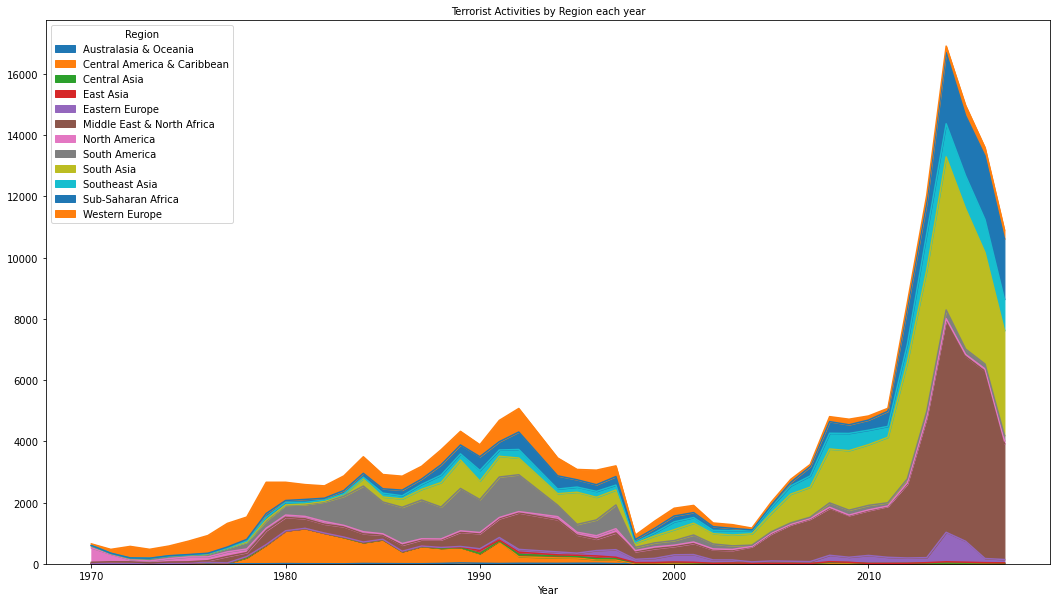

In [ ]:
#Terrorist Activities By Region
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(18,10))
plt.title("Terrorist Activities by Region each year")
plt.title("Terrorist Activities by Region each year",fontsize=10)
plt.show()

In [ ]:
#History of the Worst Terror Attacks in heatmap using Plotly
df['Wounded'] =df['Wounded'].fillna(0).astype(int)
df['Killed'] =df['Killed'].fillna(0).astype(int)
df['Casualities'] =df['Killed'] + df['Wounded']

In [ ]:
#Values are sorted by the top 40 most terror attacks as to keep the heatmap simple and easy to visualize

df1 = df.sort_values(by='Casualities',ascending = False)[:40]

In [ ]:
heat = df1.pivot_table(index = 'Country',columns ='Year',values ='Casualities')
heat.fillna(0,inplace = True)

In [ ]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Heat-Map
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default ='colab'
colorscale =[[0,'#F4F6F7'],[.3,'#A3E4D7'],[.6,'#A3E4D7'],[1,'#A3E4D7']]
heatmap  =go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title ='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks ='',nticks = 20),
    yaxis = dict(ticks='')
)
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename  = 'heatmap',show_link =False)


In [ ]:
df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

**3 Countries Affected By Terror Activities**

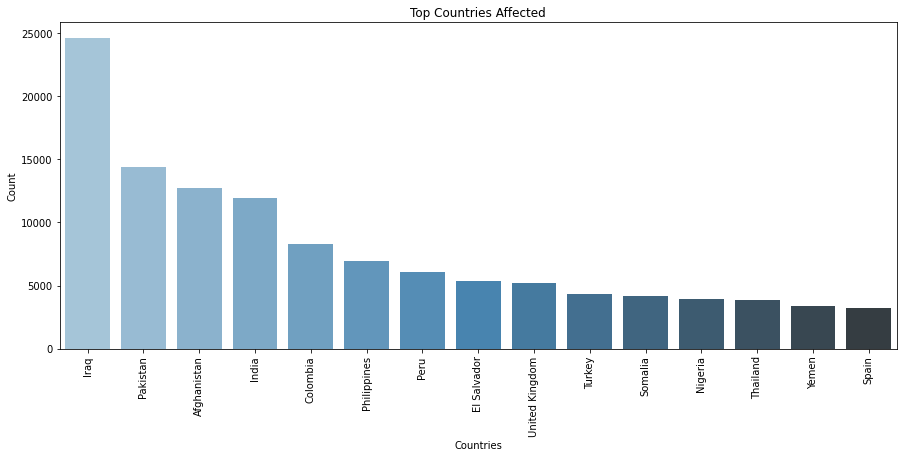

In [ ]:
#Top countries affected by Terror Attack
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

**4 Number Of Death in Each Year**

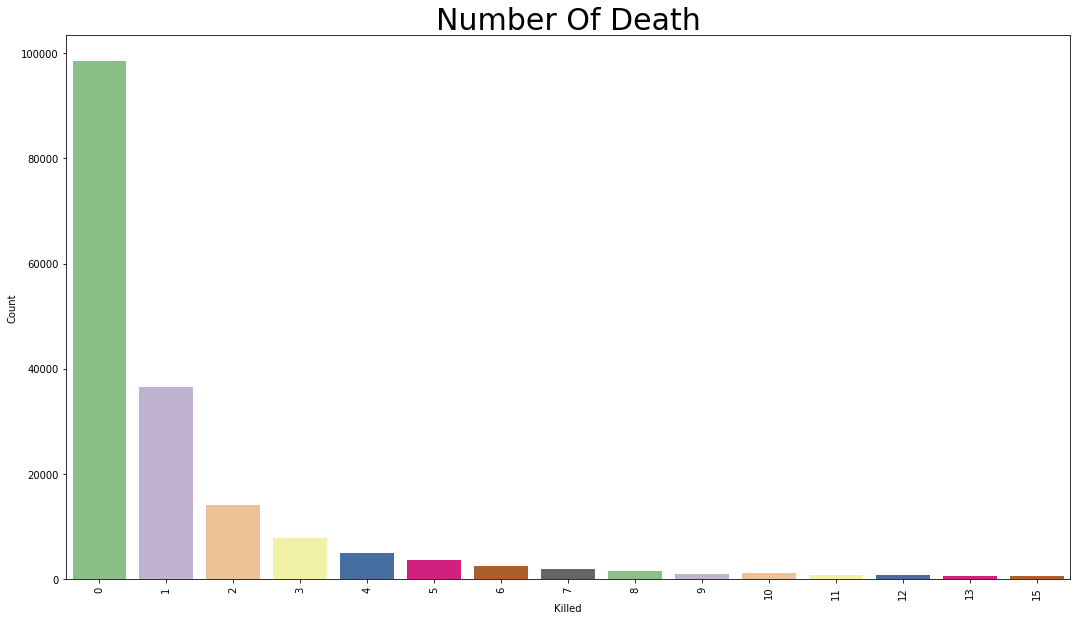

In [ ]:
#Death
plt.subplots(figsize=(18,10))
sns.barplot(df['Killed'].value_counts()[:15].index,df['Killed'].value_counts()[:15].values,palette='Accent')
plt.title('Number Of Death')
plt.title('Number Of Death',fontsize = 30)
plt.xlabel('Killed')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

**5 Number Of Injuries In Each year**

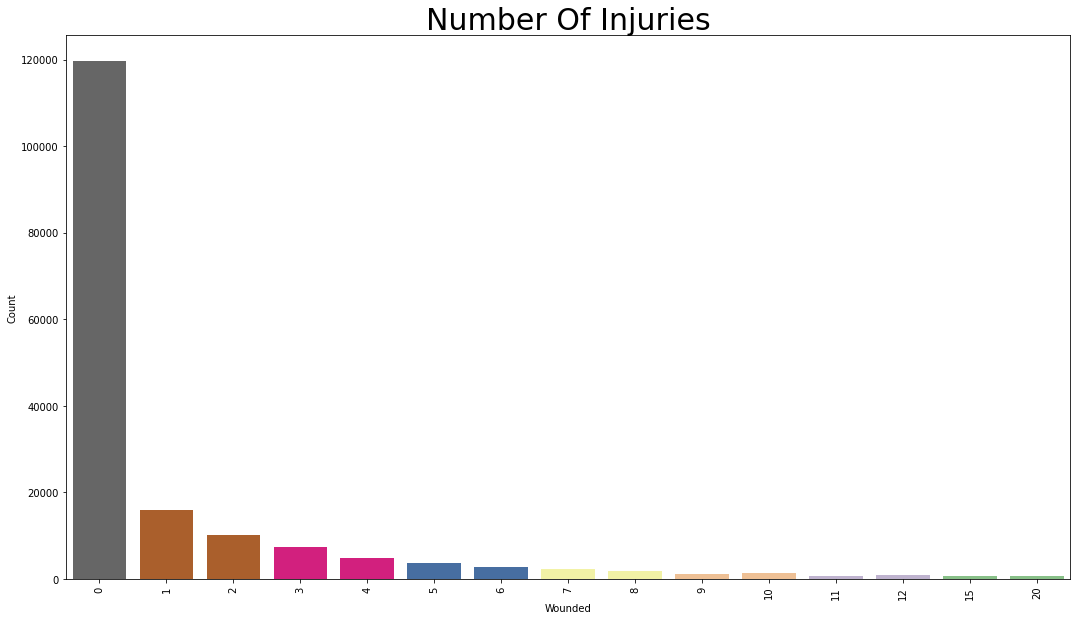

In [ ]:
#Injuries
plt.subplots(figsize=(18,10))
sns.barplot(df['Wounded'].value_counts()[:15].index,df['Wounded'].value_counts()[:15].values,palette='Accent_r')
plt.title('Number Of Injuries')
plt.title('Number Of Injuries',fontsize = 30)
plt.xlabel('Wounded')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#now to visualise the top four countries that have suffered the most using bubble charts in Plotly
terror_df = df[(df['Group'] != 'Unknown') & (df['Casualities']> 50)]
terror_df.head()

,Year,Month,Day,Extended,Country,Region,Group,city,latitude,longitude,Attacktype,Targettype,Motive,Killed,Wounded,Target,Summary,Weapon_type,State,Casualities
1200,1972,3,4,0,United Kingdom,Western Europe,NaN,Belfast,54.607712,-5.956210,Bombing/Explosion,1,2.0,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,NaN,Northern Ireland,132
1202,1972,3,6,0,United Kingdom,Western Europe,County Antrim,Belfast,54.607712,-5.956210,Bombing/Explosion,14,79.0,0,56,Belfast city center,03/06/1972: A bomb planted in a van in the cen...,NaN,Northern Ireland,56
1314,1972,5,30,0,Israel,Middle East & North Africa,NaN,Lod,32.004361,34.888229,Bombing/Explosion,6,44.0,26,72,Aircraft Terminal,NaN,NaN,Central,98
1342,1972,6,15,0,South Vietnam,Southeast Asia,NaN,Pleiku,13.977956,108.002298,Bombing/Explosion,6,42.0,81,0,CV-880,NaN,NaN,Pleiku,81
1789,1973,3,8,0,United Kingdom,Western Europe,NaN,London,51.504387,-0.140041,Bombing/Explosion,2,14.0,1,238,Court Building,NaN,NaN,England,239


In [ ]:
terror_df = terror_df.sort_values(['Region','Country'])

In [ ]:
#It is best to check null values and drop the features that are not needed.
terror_df.isnull().sum()

Year              0
Month             0
Day               0
Extended          0
Country           0
Region            0
Group          1738
city              1
latitude         78
longitude        78
Attacktype        0
Targettype        0
Motive           96
Killed            0
Wounded           0
Target           16
Summary         681
Weapon_type    2551
State             6
Casualities       0
dtype: int64

In [ ]:
terror_df = terror_df.drop(['latitude','longitude','Summary','Motive','Target'],axis = 1)

In [ ]:
terror_df = terror_df.dropna(subset=['city'])

In [ ]:
terror_df.isnull().sum()

Year              0
Month             0
Day               0
Extended          0
Country           0
Region            0
Group          1738
city              0
Attacktype        0
Targettype        0
Killed            0
Wounded           0
Weapon_type    2550
State             6
Casualities       0
dtype: int64

**6 Methods of attack**

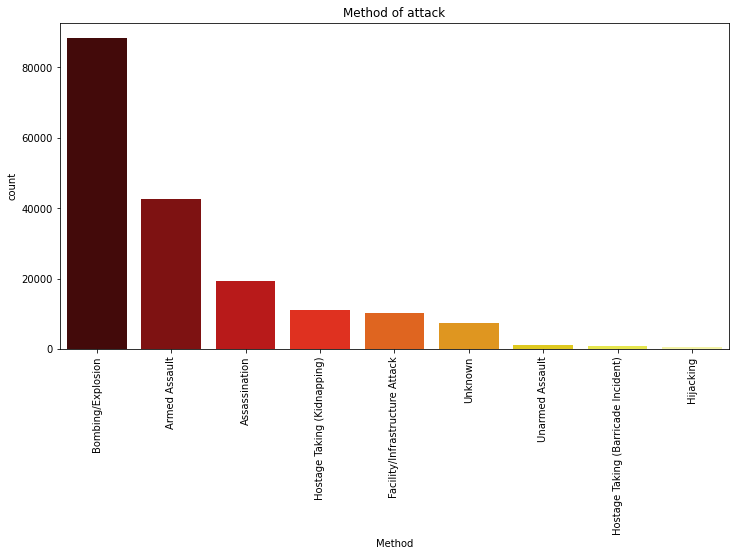

In [ ]:
#Methods of attack
plt.figure(figsize=(12,6))
sns.countplot(df['Attacktype'],data = df,order=df['Attacktype'].value_counts().index,
              palette = 'hot')
plt.xticks(rotation = 90)
plt.xlabel('Method')
plt.title('Method of attack')
plt.show()

**7 Terrorist Attacks per Country/Region**

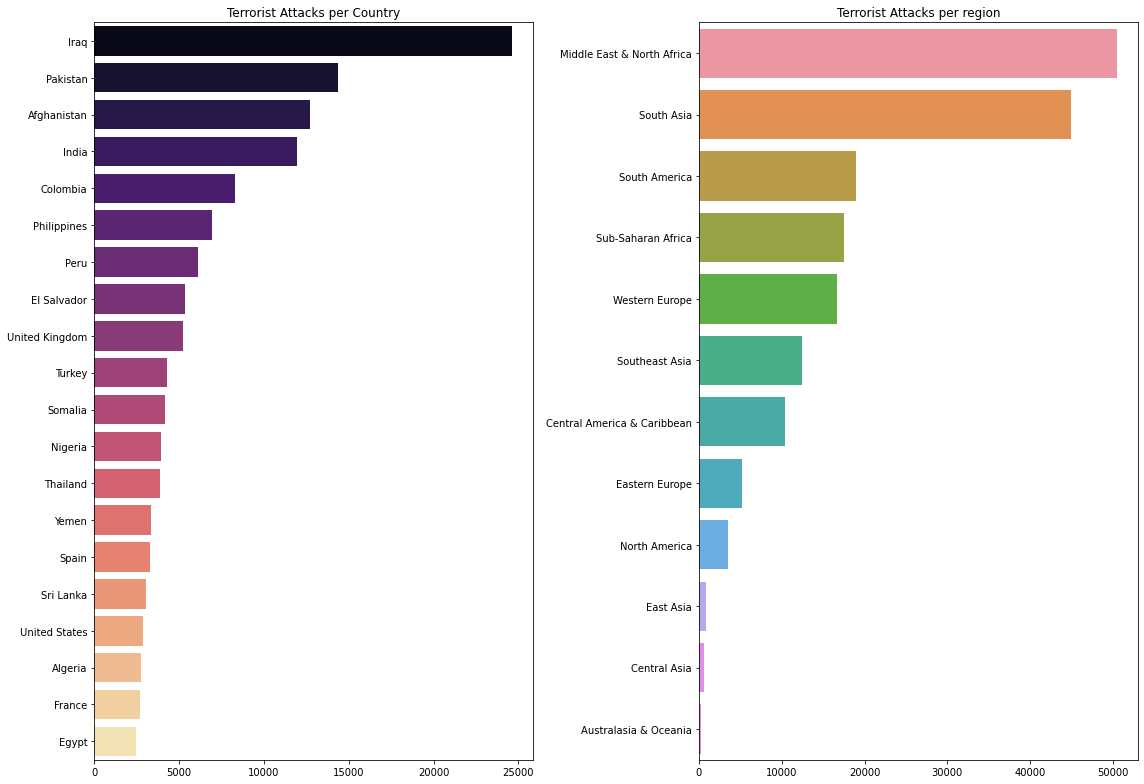

In [ ]:
#Country and Region
fig,axes = plt.subplots(figsize=(16,11),nrows = 1,ncols=2)
sns.barplot(x = df['Country'].value_counts()[:20].values,y = df['Country'].value_counts()[:20].index,
            ax = axes[0],palette ='magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['Region'].value_counts().values,y=df['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per region')
fig.tight_layout()
plt.show()

**8 Most Active Organisation**

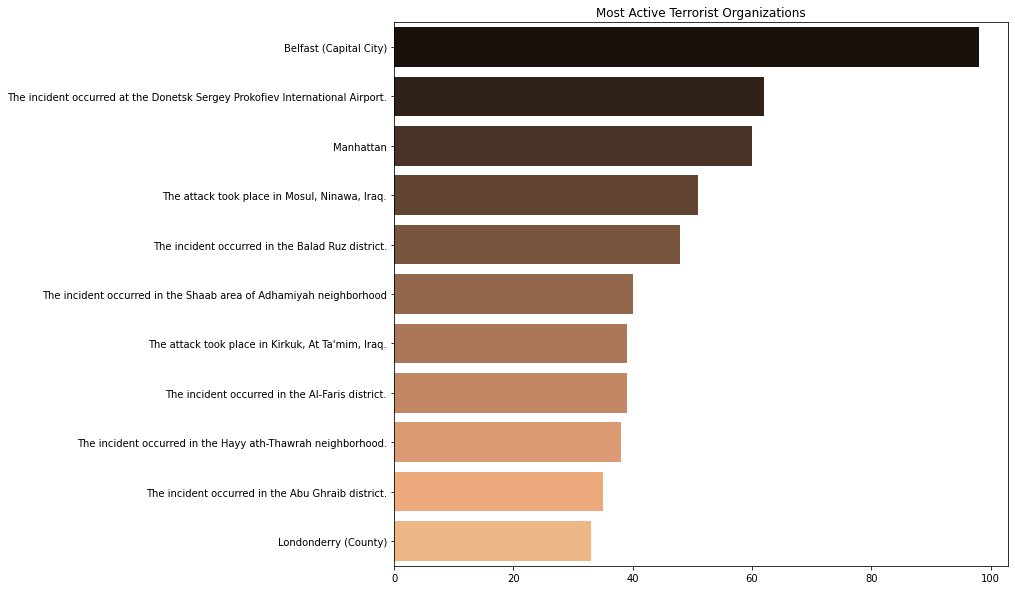

In [ ]:
#Most active organisations

plt.subplots(figsize =(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,
            palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

**9 Most Affected Targets**

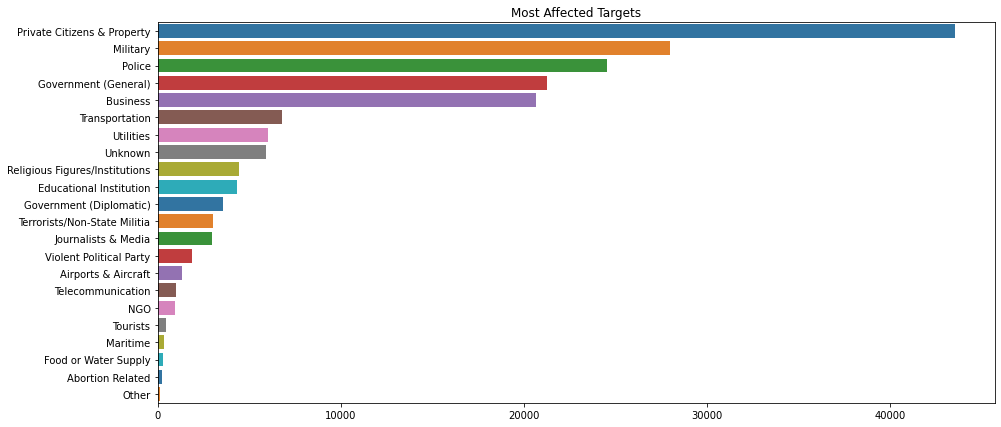

In [ ]:
#Most Affected GRoups

plt.subplots(figsize=(15,7))
sns.barplot(y=df['Targettype'].value_counts().index,x=df['Targettype'].value_counts().values,
            palette = 'tab10')
plt.title('Most Affected Targets')
plt.show()

**10 Before and After the War on Terror**

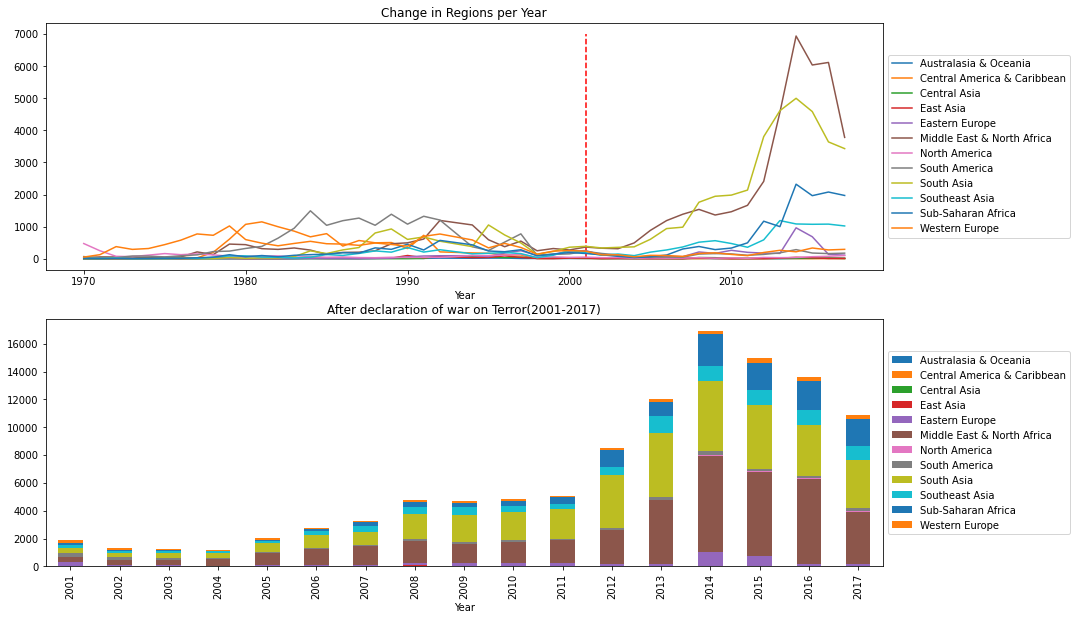

In [ ]:
#Before and After the war on  Terror

df_after =df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc ='center left',bbox_to_anchor =(1,0.5))
ax[0].vlines(x=2001,ymin =0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked = True ,ax=ax[1])
ax[1].set_title('After declaration of war on Terror(2001-2017)')
ax[1].legend(loc ='center left',bbox_to_anchor =(1,0.5))
plt.show()

From the first plot ,it is very noticable that the terrorism landscape before and after the War on Terror is vastly different.

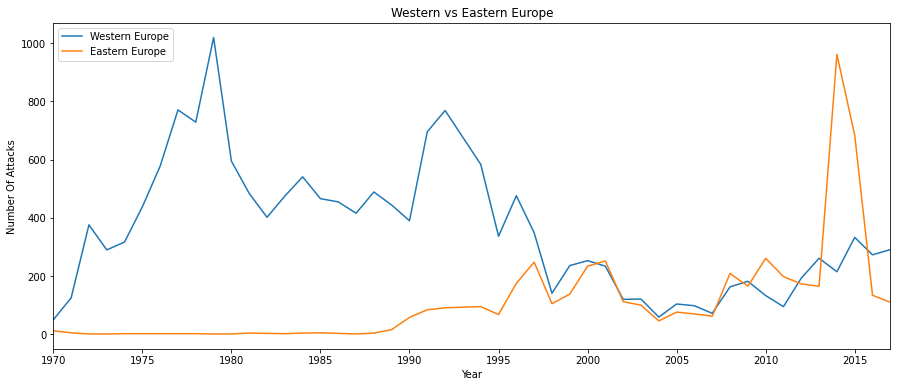

In [ ]:
#The shift from western Europe to EAstern Europe

fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
             df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
             df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel("Number Of Attacks")
plt.title("Western vs Eastern Europe")
axes.legend(labels = ['Western Europe','Eastern Europe'])
plt.show()

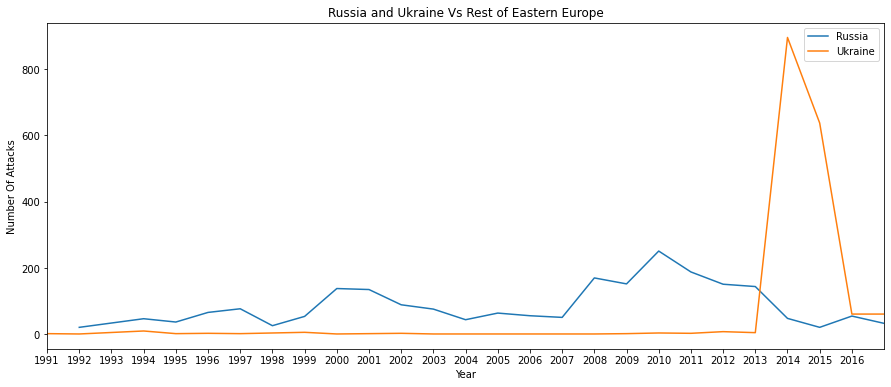

In [ ]:
fig,ax= plt.subplots(figsize=(15,6))
russia = df[(df['Country']=='Russia') & (df['Year'].between(1991,2017,inclusive = True))]['Year'].value_counts()
ukraine = df[(df['Country']=='Ukraine') & (df['Year'].between(1991,2017,inclusive = True))]['Year'].value_counts()
rest_east = df[(df['Country']=='Russia') & (df['Country']=='Ukraine')
               & (df['Region']=='Eastern Europe') & (df['Year'].between(1991,2017,inclusive = True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number Of Attacks')
plt.title("Russia and Ukraine Vs Rest of Eastern Europe")
ax.legend(labels =['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

**10 Are extended attacks more lethal??**

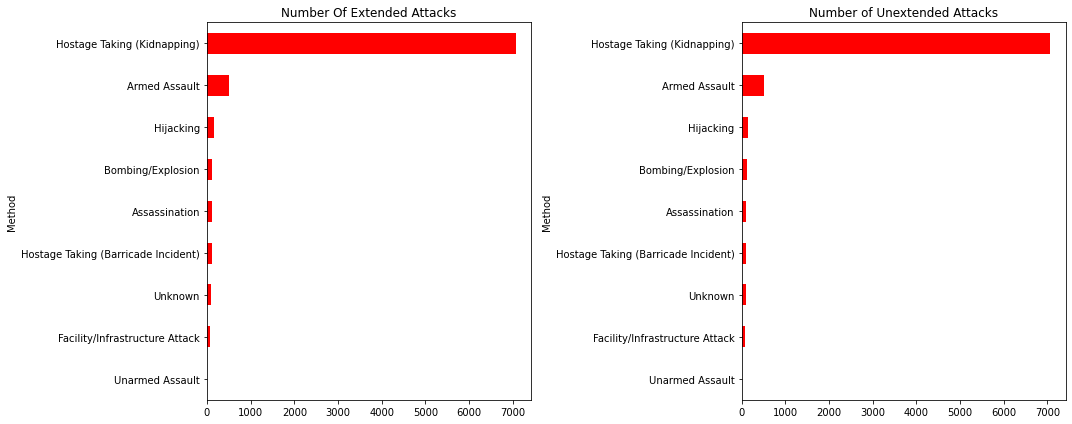

In [ ]:
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0] = df[df['Extended']==1].groupby('Attacktype').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1] = df[df['Extended']==1].groupby('Attacktype').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[1])
ax[0].set_title('Number Of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()

**Task Completed**